![example](images/director_shot.jpeg)

# Microsoft Data Analysis


**Authors:** Drew Holcombe, Edward Juarez, Raul Torres
***

![pandas](https://avatars.githubusercontent.com/u/6154722?s=280&v=4)

## Overview

Microsoft is a well-established technology corporation most known for creating computers and software. Unlike their competitors in the technology industry (Apple, Amazon, etc.), Microsoft de=oes not currently produce original video content. If they were to compete in this medium, what factors would best contribute to their success? We sought out answers using database files from Box Office Mojo, IMDB, TheMovieDB, and The Numbers, which pointed towards certain times of year, genres, and persons associated with reliable financial success.

## Business Problem

If Microsoft were to break into the film industry, what strategy would give them the best chance of success? What types of films are currently doing the best at the box office, and how can we translate this information into actionable items? How can we minimize the risk of potential films becoming box office bombs?
These questions are important because from a business perspective it will give Microsoft and upper hand by focusing on what already works instead of spending its budget in things that are not going to have a good ROI. 

We decided to focus on this data because it focuses in the monetary aspect rather than popularity as other data sets show. Like any business, Microsoft is focused in creating a product that is successful for itself and the customers. 
***

## Data Understanding

First, we used data provided by The Numbers. This contains financial information for 5,782 movies, including production budget, domestic gross, and worldwide gross. It also contains their exact release date. Second, we used data from IMDB, which provided the films' genres, as well as the persons involved in their creation (e.g. writers, actors, and directors). By weighing the degree of films' financial success against these variables, we aimed to find what genres, persons, and release dates might impact the box office success of a film.***



# Analysis of which month has the highest ROI

We want to find if there is a correlation between when a movie is published and the ROI.
First we are going to study our data and clean it so that we can manipulate it. 

In [186]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sqlite3

%matplotlib inline

In [187]:
movie_budgets = pd.read_csv("./zippedData/tn.movie_budgets.csv.gz")
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


We check for null values first and they type.


In [188]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [189]:
movie_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

Luckly we have no nulls. But as can see the data needs to get cleaned up so that we can manipulate it. 
Here we are going to start by cleaning up the date. We want to focus on the year the movie was released. 

Since the type for the columns I want to use come out as object I'll change them to int.

In [190]:
def clean_money(df, money_column):
    df[money_column] = df[money_column].str.replace(',','')
    df[money_column] = df[money_column].str.replace('$','')
    df[money_column] = pd.to_numeric(df[money_column])
    return df

In [191]:
movie_budgets = clean_money(movie_budgets, "domestic_gross")
movie_budgets = clean_money(movie_budgets, "worldwide_gross")
movie_budgets = clean_money(movie_budgets, "production_budget")

In [192]:
movie_budgets['release_date'] = (movie_budgets['release_date'].map(lambda x: x[0:3]))
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,Dec,Avatar,425000000,760507625,2776345279
1,2,May,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,Jun,Dark Phoenix,350000000,42762350,149762350
3,4,May,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,Dec,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,Dec,Red 11,7000,0,0
5778,79,Apr,Following,6000,48482,240495
5779,80,Jul,Return to the Land of Wonders,5000,1338,1338
5780,81,Sep,A Plague So Pleasant,1400,0,0


We are going to hard code in order to make the months into numbers

In [193]:
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Jan','1')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Feb','2')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Mar','3')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Apr','4')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('May','5')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Jun','6')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Jul','7')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Aug','8')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Sep','9')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Oct','10')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Nov','11')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Dec','12')
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,12,Avatar,425000000,760507625,2776345279
1,2,5,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,6,Dark Phoenix,350000000,42762350,149762350
3,4,5,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,12,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,12,Red 11,7000,0,0
5778,79,4,Following,6000,48482,240495
5779,80,7,Return to the Land of Wonders,5000,1338,1338
5780,81,9,A Plague So Pleasant,1400,0,0


In [194]:
movie_budgets = movie_budgets.astype({'release_date': 'int'})
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,12,Avatar,425000000,760507625,2776345279
1,2,5,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,6,Dark Phoenix,350000000,42762350,149762350
3,4,5,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,12,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,12,Red 11,7000,0,0
5778,79,4,Following,6000,48482,240495
5779,80,7,Return to the Land of Wonders,5000,1338,1338
5780,81,9,A Plague So Pleasant,1400,0,0



#### Making ROI column



We are going to make ROI column. We are going to use "world_wide_gross" because it includes "domestic_gross"
We are doing a division and substracting 1 becasue we want to see ROI as a percentage. 


In [195]:
movie_budgets['ROI'] = movie_budgets['worldwide_gross'] / movie_budgets['production_budget'] - 1
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,12,Avatar,425000000,760507625,2776345279,5.532577
1,2,5,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.546673
2,3,6,Dark Phoenix,350000000,42762350,149762350,-0.572108
3,4,5,Avengers: Age of Ultron,330600000,459005868,1403013963,3.243841
4,5,12,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.153696


Now that we have that we are going to get the median because it is less likely to get affected by outliers.

In [196]:
mean_roi_all_year = movie_budgets.groupby(['release_date'])['ROI'].median()
mean_roi_all_year

release_date
1     0.512054
2     0.740280
3     0.531329
4     0.399866
5     1.075749
6     1.252110
7     1.244067
8     0.682874
9     0.300893
10    0.441032
11    1.168355
12    0.628805
Name: ROI, dtype: float64

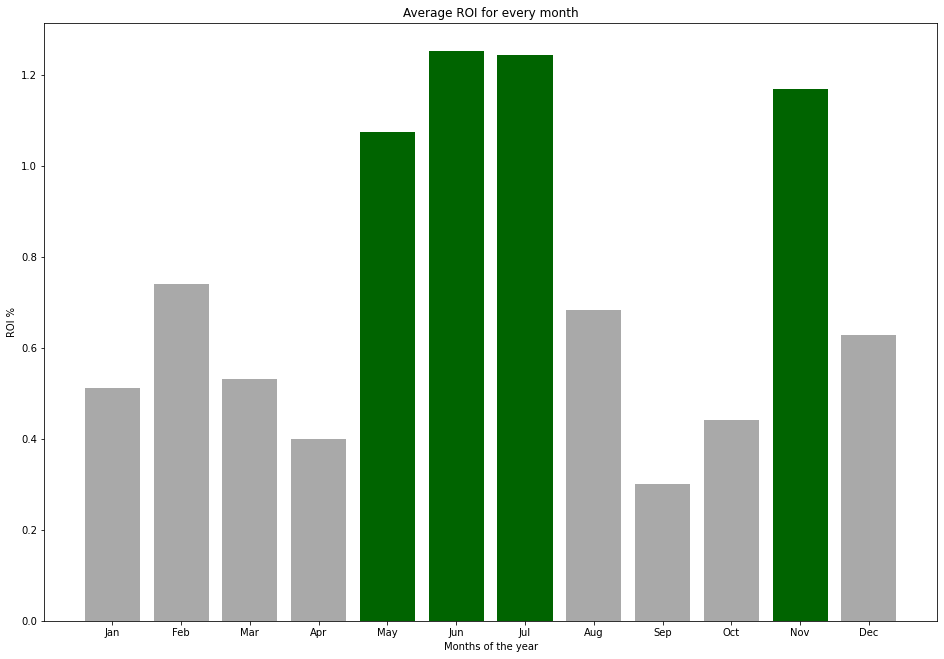

In [197]:
fig, ax = plt.subplots(figsize=(16, 11))
height = [0.512054, 0.740280, 0.531329, 0.399866, 1.075749, 1.252110, 1.244067, 0.682874, 0.300893, 0.441032, 1.168355, 0.628805]

bars = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color=('darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgreen', 'darkgreen', 
                              'darkgreen', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgreen', 'darkgrey'))


# Create names on the x-axis
plt.xticks(y_pos, bars)

# Label x, y and title
ax.set_title('Average ROI for every month')
ax.set_ylabel('ROI %')
ax.set_xlabel('Months of the year')

# Show graphic
plt.show()

Based on a sample data for movies that have been released over the last two decades we found the best time to release a movie.  

As the graph shows, May Jun and July are the months that show the highest return on investment surpassing 100% 

On the other hand, the least favorable month to release a movie is during April, September and October. Bringing in less than 40% ROI. 

I also want to point out November. 
Although it might seem like another month that could be good to release a movie because of the high ROI. We believe that the reason for that is because it approaches the end of the year and studios want to release movies before the deadline for film festivals. 



# Analysis of which genre has the highest ROI

In [198]:
con = sqlite3.connect("./zippedData/im.db")
cursor = con.cursor()

In [199]:
movie_basics = pd.read_sql("""

SELECT *
FROM movie_basics
""", con).drop_duplicates(subset = ['movie_id'])

In [200]:
merge_ds = movie_budgets.merge(movie_basics,left_on='movie',right_on='primary_title',how='inner')

merge_ds['profit'] = merge_ds['worldwide_gross'] - merge_ds['production_budget']
merge_ds['ROI'] = merge_ds['profit'] / merge_ds['production_budget']* 100
merge_ds['Profit Margin'] = merge_ds['profit'] / merge_ds['worldwide_gross'] * 100

In [201]:
#deleting col to start narrowing down data to view value

deleted_columns = ['id', 'movie_id', 'primary_title', 'original_title', 
                  'start_year', 'runtime_minutes']
merge_ds.drop(columns=deleted_columns, inplace=True)


In [202]:
genres_list = ['Romance','Thriller','Action','Comedy','Drama','Sci-Fi','Documentary','Animation','Fantasy','Adventure','Family','Sport','War','Horror']

genres_dict = {}
genres_dict['Genre'] = []
genres_dict['Median Profit Margin'] = []
genres_dict['Median Budget'] = []
genres_dict['Median ROI'] = []
genres_dict['Number of Films'] = []

for genre in genres_list:
    merge_ds[genre] = merge_ds['genres'].str.contains(genre)
    
    genres_dict['Genre'].append(genre)
    genres_dict['Median Profit Margin'].append(merge_ds.groupby([genre])[['Profit Margin']].agg('median').sort_values(by = 'Profit Margin', ascending = False).iloc[0][0])
    genres_dict['Median Budget'].append(merge_ds.groupby([genre])[['production_budget']].agg('median').sort_values(by = 'production_budget', ascending = False).iloc[0][0])
    genres_dict['Median ROI'].append(merge_ds.groupby([genre])[['ROI']].agg('median').sort_values(by = 'ROI', ascending = False).iloc[0][0])
    genres_dict['Number of Films'].append(merge_ds['genres'].str.contains(genre).sum() )

    
print(merge_ds['Profit Margin'].median())


genres_df = pd.DataFrame(genres_dict)
genres_df = genres_df.sort_values(by = 'Median Profit Margin', ascending = False)
display(genres_df)   

32.031595986485165


,Genre,Median Profit Margin,Median Budget,Median ROI,Number of Films
7,Animation,64.200283,74500000,179.331814,148
9,Adventure,56.391856,73621553,129.316965,490
5,Sci-Fi,53.771616,30000000,116.317319,229
8,Fantasy,52.374319,41000000,109.971078,202
10,Family,47.181782,20000000,89.354043,204
3,Comedy,46.240603,20000000,86.014009,842
2,Action,42.278494,38000000,73.245654,710
0,Romance,40.663051,17000000,68.585792,372
4,Drama,39.343254,20000000,64.864003,1817
6,Documentary,33.758716,17250000,50.963395,499


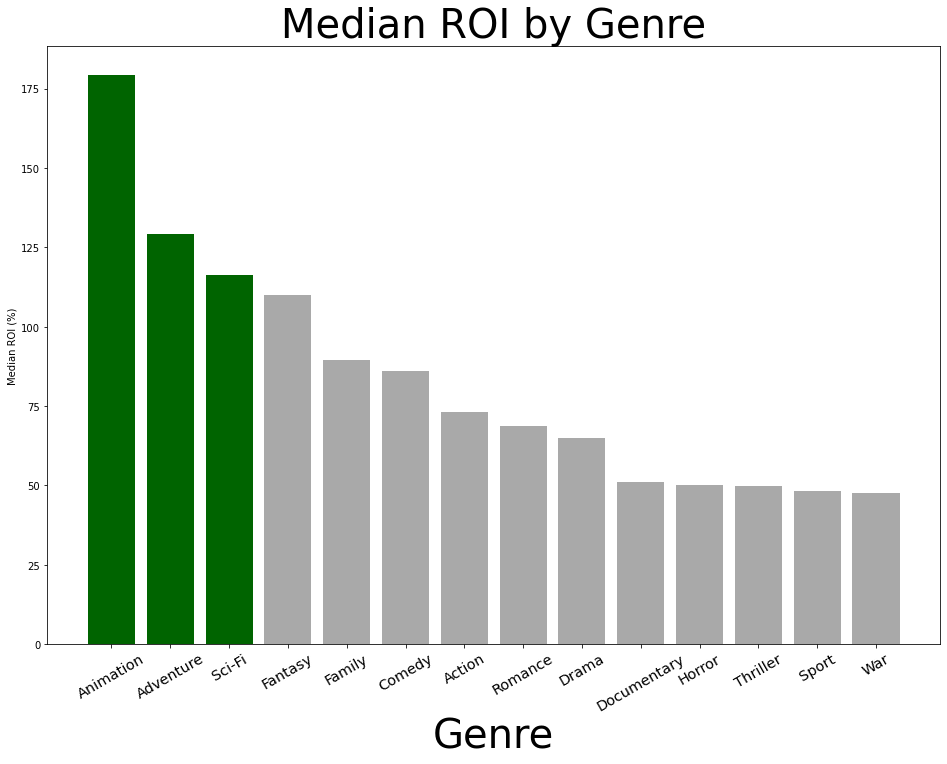

In [203]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 11))
height = (genres_df['Median ROI'])
bars = (genres_df['Genre'])
ax.bar(x=bars, height=height,color=['darkgreen','darkgreen','darkgreen',
                                 'darkgrey','darkgrey','darkgrey','darkgrey',
                                    'darkgrey','darkgrey','darkgrey','darkgrey',
                                    'darkgrey','darkgrey','darkgrey'])

# Label x, y and title
ax.set_title('Median ROI by Genre', size=40)
ax.set_ylabel('Median ROI (%)')
ax.set_xlabel('Genre', size=40)

plt.xticks(rotation=30, size=14.50)
# Show graphic
plt.show()

In conclusion we merged two data sets in order to work with a larger sample and get a more accurate read on the data. We deleted and cleaned the information that was not necessary to find the information we were looking for. The information that was used was the genres budget, domestic gross, and worldwide gross. From the graph it is shown that the top 3 genres in order to generate the highest ROI are Animation, Adventure, and Science fiction.



# Impact of writers, directors, and actors on ROI

In [204]:
movie_budgets = pd.read_csv("./zippedData/tn.movie_budgets.csv.gz")

In [205]:
movie_budgets["production_budget"]
def clean_money(df, money_column):
    "With input of a dataframe and one of its columns containing an amount of money in string format, removes symbols"
    "and converts strings to integers"
    df[money_column] = df[money_column].str.replace(',','')
    df[money_column] = df[money_column].str.replace('$','')
    df[money_column] = pd.to_numeric(df[money_column])
    return df

#Run function on movie_budgets money columns
movie_budgets = clean_money(movie_budgets,'production_budget')
movie_budgets = clean_money(movie_budgets,'domestic_gross')
movie_budgets = clean_money(movie_budgets,'worldwide_gross')

In [206]:
#Create new "profit" column
movie_budgets["profit"] = movie_budgets["worldwide_gross"] - movie_budgets["production_budget"]

In [207]:
movie_budgets["ROI"] = (movie_budgets["profit"]/movie_budgets["production_budget"]) *100

In [208]:
#Query tables from im.db
persons = pd.read_sql("""
SELECT *
FROM persons
""", con)
writers = pd.read_sql("""
SELECT *
FROM writers
""", con)
films = pd.read_sql("""
SELECT *
FROM movie_basics
""", con)

In [209]:
#Use persons table to link writers to associated movie ids, drop unnecessary columns
full_writers = writers.merge(persons, left_on="person_id", right_on="person_id", how="left")
full_writers.drop(labels=["person_id", "birth_year", "primary_profession"], axis=1, inplace=True)
full_writers = full_writers.rename(columns={"primary_name": "writer_name"})

In [210]:
#Use films table to convert movie IDs into titles, drop unnecessary columns
film_writers = full_writers.merge(films, left_on="movie_id", right_on="movie_id", how="left")
film_writers.drop(labels=["movie_id","genres", "runtime_minutes", "start_year", "original_title"], axis=1, inplace=True)

In [211]:
#Link writers/films with their respective financial information
writer_profit = movie_budgets.merge(film_writers, left_on="movie", right_on="primary_title", how="left")
writer_profit.dropna(subset=["writer_name"], inplace=True)

In [212]:
#clean; drop duplicates
clean_writers = writer_profit.drop_duplicates()

In [213]:
#find the average ROI for all films with associated writers
avg_writer_roi = clean_writers.drop_duplicates(subset="movie").mean()["ROI"]

In [214]:
#Create dictionary of all writers with above-average
#ROI films as keys and their number of such films as values

writer_films_strong = clean_writers.drop(clean_writers[clean_writers.ROI < avg_writer_roi].index)
potential_writers = writer_films_strong.drop(writer_films_strong[writer_films_strong["death_year"]>1].index)
writer_pros = dict(potential_writers["writer_name"].value_counts())

In [215]:
#Create dictionary of all writers with below-average
#ROI films as keys and their number of such films as values

writer_films_weak = clean_writers.drop(clean_writers[clean_writers.ROI > avg_writer_roi].index)
questionable_writers = writer_films_weak.drop(writer_films_weak[writer_films_weak["death_year"]>1].index)
writer_cons = dict(questionable_writers["writer_name"].value_counts())

In [216]:
#Create dictionary of all writers and the number of films they've written
writer_totals = dict(clean_writers["writer_name"].value_counts())

In [217]:
#Find each writer's percentage of above-average ROI films compared to their total
writer_percent = {}
for writer in writer_totals:
    if writer in writer_pros and writer in writer_cons:
        writer_percent[writer] = writer_pros[writer] / writer_totals[writer] * 100
    elif writer in writer_pros and writer not in writer_cons:
        writer_percent[writer] = 100
    elif writer in writer_cons and writer not in writer_pros:
        writer_percent[writer] = 0
    else:
        pass
#Create a dictionary with all writers as keys and said percentages
#as values, ranked from highest to lowest
ranked_writers = dict(sorted(writer_percent.items(), key=lambda x:x[1], reverse=True))
#Create dictionary of writers with 100% above-average
#ROI films as keys and their number of films as values
perfect_writers = {}
for key in ranked_writers:
    if ranked_writers[key] == 100:
        perfect_writers[key] = writer_totals[key]

In [218]:
#How many of these writers have written three or more films?
writer_count = 0
for writer in perfect_writers.values():
    if writer >= 3:
        writer_count += 1
print(f"{writer_count} writers have a 100% success rate writing films with an above-average ROI, and have written three or more films.")

26 writers have a 100% success rate writing films with an above-average ROI, and have written three or more films.


In [219]:
#Create lists of (1) the first 8 writers from this list and (2) the number of films they've written
writer_x = list(perfect_writers.keys())[:8]
writer_y = list(perfect_writers.values())[:8]

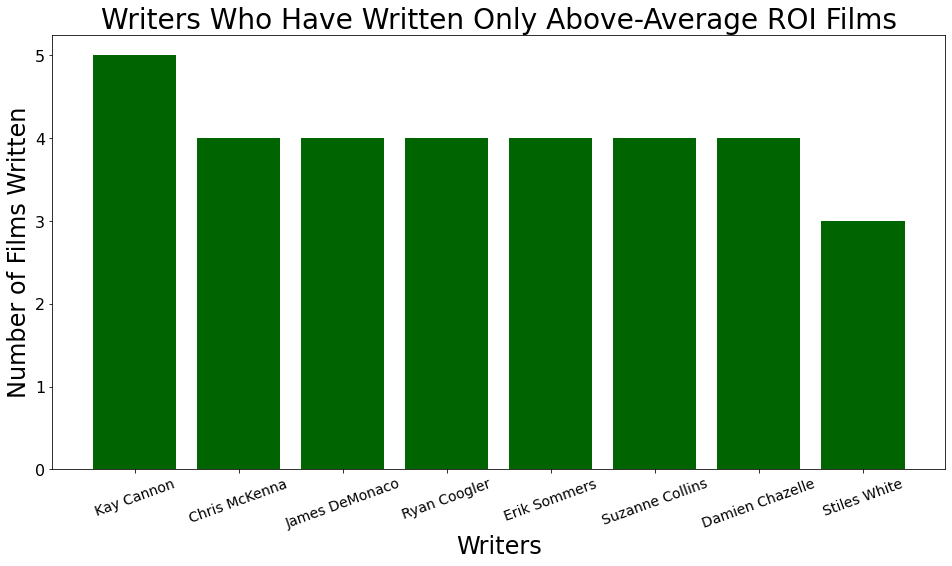

In [220]:
#Graph it
fig, ax = plt.subplots(figsize=(16, 8))

ax.bar(x=writer_x, height=writer_y, color="darkgreen")

ax.set_xlabel('Writers', size=24)
ax.set_ylabel('Number of Films Written', size=24)
ax.set_title('Writers Who Have Written Only Above-Average ROI Films', size=28)
plt.xticks(rotation=20, size=14)
plt.yticks(size=16);

# Directors

In [221]:
#Query director table from im.db
directors = pd.read_sql("""
SELECT *
FROM directors
""", con)

In [222]:
#Use persons table to link directors to associated movie ids, drop unnecessary columns
full_directors = directors.merge(persons, left_on="person_id", right_on="person_id", how="left")
full_directors.drop(labels=["person_id", "birth_year", "primary_profession"], axis=1, inplace=True)
full_directors = full_directors.rename(columns={"primary_name": "director_name"})

In [223]:
#Merge via movie ID with full movie info in films table, drop unnecessary columns
film_directors = full_directors.merge(films, left_on="movie_id", right_on="movie_id",
              how="left")
film_directors.drop(labels=["movie_id","genres", "runtime_minutes", "start_year", "original_title"], axis=1, inplace=True)

In [224]:
#Link directors/films with their respective financial information
dir_profit = movie_budgets.merge(film_directors, left_on="movie", right_on="primary_title", how="left")
dir_profit.dropna(subset=["director_name"], inplace=True)

In [225]:
#Clean (drop duplicates)
clean_dir = dir_profit.drop_duplicates()

In [226]:
#find the average ROI for all films with associated directors
avg_dir_roi = clean_dir.drop_duplicates(subset="movie").mean()["ROI"]

In [227]:
#Create dictionary of all directors with above-average
#ROI films as keys and their number of such films as values
dir_films_strong = clean_dir.drop(clean_dir[clean_dir.ROI < avg_dir_roi].index)
potential_dir = dir_films_strong.drop(dir_films_strong[dir_films_strong["death_year"]>1].index)
dir_pros = dict(potential_dir["director_name"].value_counts())

In [228]:
#Create dictionary of all directors with below-average
#ROI films as keys and their number of such films as values
dir_films_weak = clean_dir.drop(clean_dir[clean_dir.ROI > avg_dir_roi].index)
questionable_dir = dir_films_weak.drop(dir_films_weak[dir_films_weak["death_year"]>1].index)
dir_cons = dict(questionable_dir["director_name"].value_counts())

In [229]:
#Create dictionary of all directors and the number of films they've directed
dir_totals = dict(clean_dir["director_name"].value_counts())

In [230]:
#Find each director's percentage of above-average ROI films compared to their total
dir_percent = {}
for _dir in dir_totals:
    if _dir in dir_pros and _dir in dir_cons:
        dir_percent[_dir] = dir_pros[_dir] / dir_totals[_dir] * 100
    elif _dir in dir_pros and _dir not in dir_cons:
        dir_percent[_dir] = 100
    elif _dir in dir_cons and _dir not in dir_pros:
        dir_percent[_dir] = 0
    else:
        pass
#Create a dictionary with all directors as keys and said percentages
#as values, ranked from highest to lowest
ranked_dir = dict(sorted(dir_percent.items(), key=lambda x:x[1], reverse=True))
#Create dictionary of writers with 100% above-average
#ROI films as keys and their number of films as values
perfect_dir = {}
for key in ranked_dir:
    if ranked_dir[key] == 100:
        perfect_dir[key] = dir_totals[key]

In [231]:
#How many of these directors have directed three or more films?
dir_count = 0
for _dir in perfect_dir.values():
    if _dir >= 3:
        dir_count += 1
print(f"{dir_count} directors have a 100% success rate directing films with an above-average ROI, and have directed three or more films.")

16 directors have a 100% success rate directing films with an above-average ROI, and have directed three or more films.


In [232]:
#Create lists of (1) the first 8 directors from this list and (2) the number of films they've directed
dir_x = list(perfect_dir.keys())[:8]
dir_y = list(perfect_dir.values())[:8]

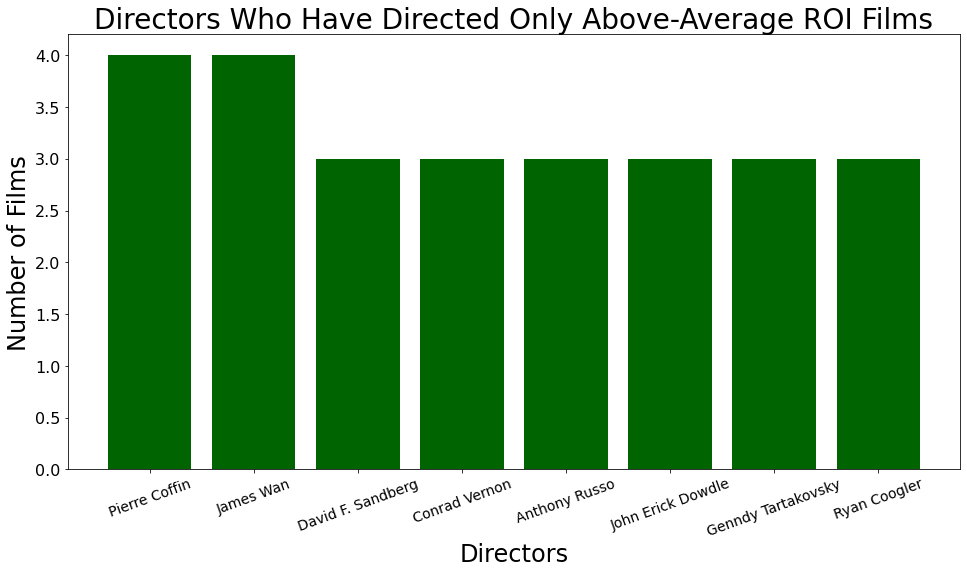

In [233]:
#Graph it
fig, ax = plt.subplots(figsize=(16, 8))

ax.bar(x=dir_x, height=dir_y, color="darkgreen")

ax.set_xlabel('Directors', size=24)
ax.set_ylabel('Number of Films', size=24)
ax.set_title('Directors Who Have Directed Only Above-Average ROI Films', size=28)
plt.xticks(rotation=20, size=14)
plt.yticks(size=16);

# Actors

In [234]:
#Query prinipals table from IMDB
principals =  pd.read_sql("""
SELECT *
FROM principals
""", con)

In [235]:
#Drop all non-actors and unnecessary columns
actors = principals.drop(principals[(principals.category != "actress")&(principals.category != "actor")].index)
actors.drop(labels=["job", "characters", "ordering", "category"], axis=1, inplace=True)

In [236]:
#Use persons table to link actors to associated movie ids, drop unnecessary columns
full_actors = actors.merge(persons, left_on="person_id", right_on="person_id", how="left")
full_actors.drop(labels=["birth_year", "primary_profession"], axis=1, inplace=True)
full_actors = full_actors.rename(columns={"primary_name": "actor_name"})

In [237]:
#Merge via movie ID with full movie info in films table, drop unnecessary columns
film_actors = full_actors.merge(films, left_on="movie_id", right_on="movie_id", how="left")
film_actors.drop(labels=["movie_id","genres", "runtime_minutes", "start_year", "original_title"], axis=1, inplace=True)

In [238]:
#Link actors/films with their respective financial information
actor_profit = movie_budgets.merge(film_actors, left_on="movie", right_on="primary_title", how="left")
actor_profit.dropna(subset=["actor_name"], inplace=True)

In [239]:
#Clean (drop duplicates)
clean_actors = actor_profit.drop_duplicates()

In [240]:
#find the average ROI for all films with associated actors
avg_actor_roi = clean_actors.drop_duplicates(subset="movie").mean()["ROI"]

In [241]:
#Create dictionary of all actors with above-average
#ROI films as keys and their number of such films as values
actor_films_strong = clean_actors.drop(clean_actors[clean_actors.ROI < avg_actor_roi].index)
potential_actors = actor_films_strong.drop(actor_films_strong[actor_films_strong["death_year"]>1].index)
actor_pros = dict(potential_actors["actor_name"].value_counts())

In [242]:
#Create dictionary of all actors with below-average
#ROI films as keys and their number of such films as values
actor_films_weak = clean_actors.drop(clean_actors[clean_actors.ROI > avg_actor_roi].index)
questionable_actors = actor_films_weak.drop(actor_films_weak[actor_films_weak["death_year"]>1].index)
actor_cons = dict(questionable_actors["actor_name"].value_counts())

In [243]:
#Create dictionary of all directors and the number of films they've directed
actor_totals= dict(clean_actors["actor_name"].value_counts())

In [244]:
#Find each actors's percentage of above-average ROI films compared to their total
actor_percent = {}
for actor in actor_totals:
    if actor in actor_pros and actor in actor_cons:
        actor_percent[actor] = actor_pros[actor] / actor_totals[actor] * 100
    elif actor in dir_pros and actor not in dir_cons:
        actor_percent[actor] = 100
    elif actor in dir_cons and actor not in dir_pros:
        actor_percent[actor] = 0
    else:
        pass
#Create a dictionary with all actors as keys and said percentages
#as values, ranked from highest to lowest
ranked_actors = dict(sorted(actor_percent.items(), key=lambda x:x[1], reverse=True))
#Create dictionary of actors with 100% above-average
#ROI films as keys and their number of films as values
perfect_actors = {}
for key in ranked_actors:
    if ranked_actors[key] == 100:
        perfect_actors[key] = actor_totals[key]

In [245]:
#How many of these actors have appeared in three or more films?
actor_count = 0
for actor in perfect_actors.values():
    if actor >= 3:
        actor_count += 1
print(f"{actor_count} actor has a 100% success rate appearing in films with an above-average ROI, and has acted in three or more films.")

1 actor has a 100% success rate appearing in films with an above-average ROI, and has acted in three or more films.


In [246]:
#Create lists of (1) the first 8 actors from this list and
#(2) the number of films they've appeared in
actor_x = list(perfect_actors.keys())[:8]
actor_y = list(perfect_actors.values())[:8]

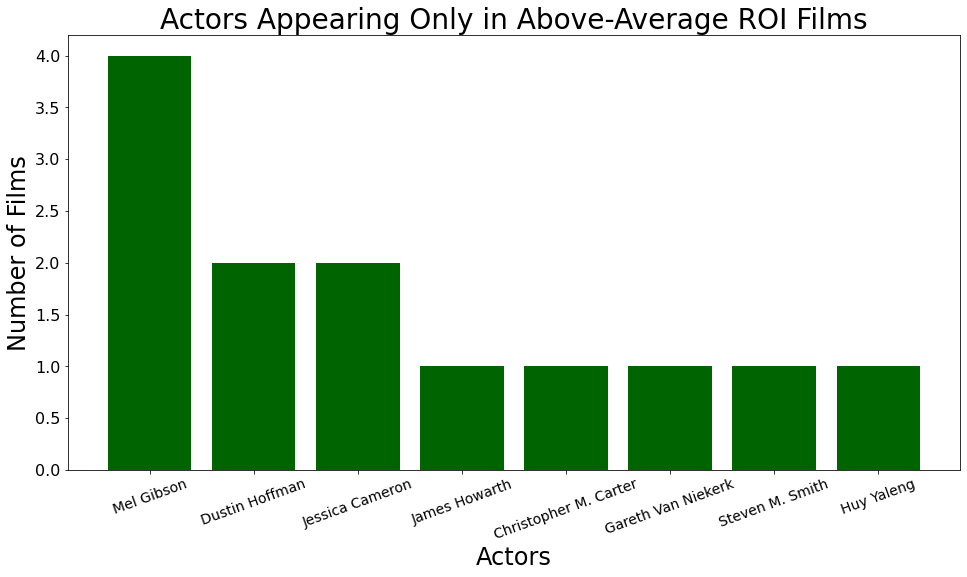

In [247]:
#Graph it
fig, ax = plt.subplots(figsize=(16, 8))

ax.bar(x=actor_x, height=actor_y, color="darkgreen")

ax.set_xlabel('Actors', size=24)
ax.set_ylabel('Number of Films', size=24)
ax.set_title('Actors Appearing Only in Above-Average ROI Films', size=28)
plt.xticks(rotation=20, size=14)
plt.yticks(size=16);

# Synthesis

In [248]:
#Find the percentage of each group that has a "perfect"
#record of above-average ROI films
perc_perf_writers = len(perfect_writers)/len(ranked_writers)*100
perc_perf_dir = len(perfect_dir)/len(ranked_dir)*100
perc_perf_actors = len(perfect_actors)/len(ranked_actors)*100

In [249]:
#Set said figures lists for graph
syn_list_x = ["Writers", "Directors", "Actors"]
syn_list_y = [perc_perf_writers, perc_perf_dir, perc_perf_actors]

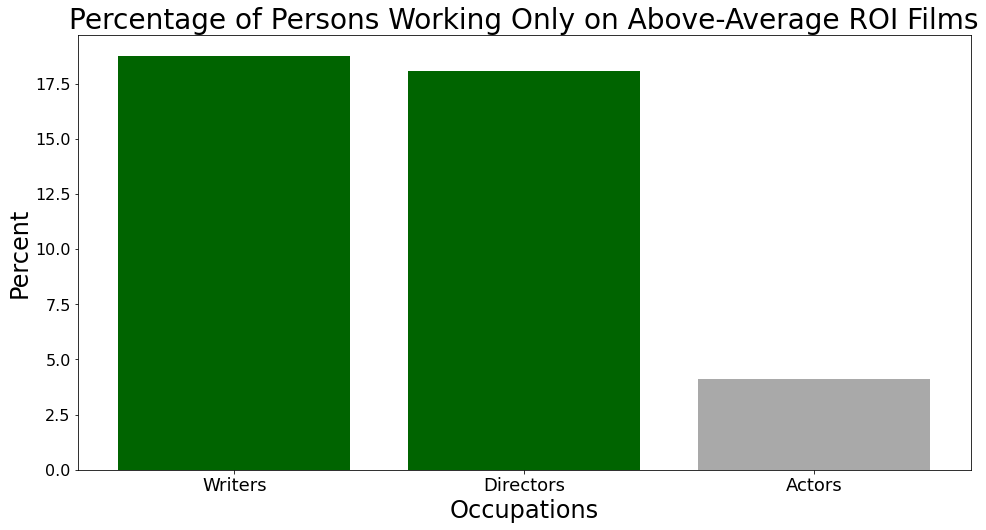

In [250]:
#Graph it
fig, ax = plt.subplots(figsize=(16, 8))

ax.bar(x=syn_list_x, height=syn_list_y, color=["darkgreen", "darkgreen", "darkgrey"])
ax.set_xlabel('Occupations', size=24)
ax.set_ylabel('Percent', size=24)
ax.set_title('Percentage of Persons Working Only on Above-Average ROI Films', size=28)
plt.xticks(size=18)
plt.yticks(size=16);

## Evaluation
Our evalation solves the intial problem because now Microsoft is going to be able to initiate a successful movie studio using data to back up their decisions. 

We found that genres with the highest median ROIs are animation, adventure, and science-fiction. These genres yield a median ROI between 115% and 180%. This indicates that films within these genres are the most likely to yield a strong ROI. 
We found that actors, writers, and directors show very different levels of impact on their films' box office performance. Of the writers in our data set, nearly 16% had a perfect track record of writing films with above-average ROIs; this set includes 26 writers who have written three or more films, all with above-average ROIs. For directors, just over 13% had only directed films with above-average ROIs, including 16 directors who had directed three or more films. For actors, less than 3% had only appeared in films with above-average ROIs, only one of whom had appeared in more than two films (Mel Gibson). This indicates that writers and directors are stronger indicators of a film's financial success, while actors are more likely to appear in both high- and low- ROI films. 
We found that the months with the highest ROIs for all films are May, June, and July, as well as November. Each of these months has a median ROI of well over 100%. This indicates that films released in these months are the most likely to return a strong ROI. Notably, November is a popular month due to being soon before the deadline for awards season; this results in voters having these films freshest in their minds during voting, making it a popular choice for films targetting awards shows. The months of May, June, and July, meanwhile, seem to be the most popular time to go to movie theatres, causing these films to have higher ROIs than films released in other months.

***

# Conclusion

Based on our data and results, we believe that a new movie studio should target the high-ROI genres of animation, action, and science-fiction. These films should be produced with writers and directors who have a strong track record of financial success; for animation films, we reccomend Phil Lord and Christopher Miller, known for The Lego Movie and Spider Man: Into the Spider-Verse, and for action and science-fiction, we reccomend Damien Chazelle, best known for Black Panther. For directors, we reccommend Pierre Coffin, best known for the Dispicable Me franchise, for animation films, and Anthony Russo, best known for Avengers: Endgame and Infinity War, for science-fiction and action films. We reccommend these films be released during the summer to target high theatre traffic during those months.

With more time and resources, we would like to research the measures of dispersion of the ROIs of each artists' films. This would either solidify or redirect our observations in this area. This might also identify other artists with strongly consistent ROIs. We would also like to look into the interaction of these variables. Do certain genres perform especially well during certain months? Do certain artists see their best ROIs in certain genres? Further research would allow us to provide more specific reccomendations that would further facilitate financial growth.